In [ ]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
subprocess.run(["gcc", "-o", "pi_p", "pi_p.c", "-lm", "-lpthread"])

subprocess.run(["gcc", "-o", "pi_s", "pi.c", "-lm"])

subprocess.run(["gcc", "-o", "fibonacci", "fibonacci.c", "-lpthread"])

CompletedProcess(args=['gcc', '-o', 'fibonacci', 'fibonacci.c', '-lpthread'], returncode=0)

    Tamaño  Tiempo (s)  Eficiencia
0        1    0.000971    1.000000
1        2    0.000765    0.634507
2        3    0.000609    0.531323
3        4    0.000673    0.360393
4        5    0.000652    0.297805
5        6    0.000652    0.248080
6        7    0.000623    0.222483
7        8    0.000630    0.192464
8        9    0.000598    0.180284
9       10    0.000628    0.154497
10      11    0.000628    0.140612
11      12    0.000743    0.108804
12      13    0.000754    0.099037
13      14    0.000704    0.098471
14      15    0.000596    0.108647


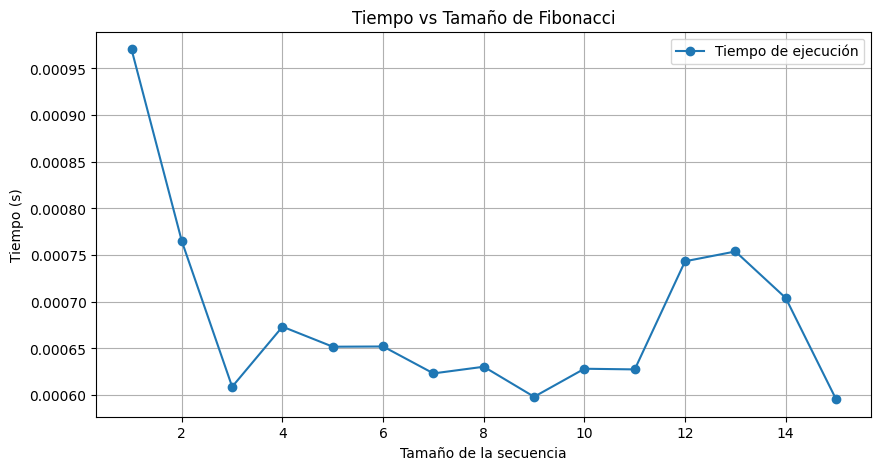

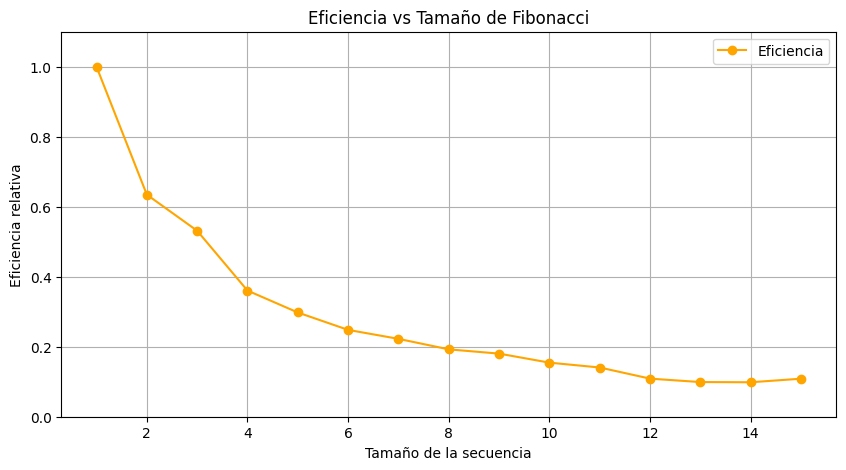

In [ ]:
size = 15

f_out_thread = []
f_out_time = []

for i in range(1, size + 1):

    start_time = time.time()

    out = subprocess.run(["./fibonacci", str(i)], capture_output=True, text=True)

    end_time = time.time()

    time_taken = end_time - start_time


    f_out_thread.append(i)
    f_out_time.append(time_taken)


df = pd.DataFrame({
    "Tamaño": f_out_thread,
    "Tiempo (s)": f_out_time
})

# Calcular eficiencia relativa (opcional)
T1 = df["Tiempo (s)"].iloc[0]  # tiempo con tamaño 1
df["Eficiencia"] = T1 / (df["Tamaño"] * df["Tiempo (s)"])

print(df)

# --- Gráfica Tiempo vs Tamaño ---
plt.figure(figsize=(10,5))
plt.plot(df["Tamaño"], df["Tiempo (s)"], marker='o', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Tamaño de Fibonacci")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Eficiencia vs Tamaño ---
plt.figure(figsize=(10,5))
plt.plot(df["Tamaño"], df["Eficiencia"], marker='o', color='orange', label="Eficiencia")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Eficiencia relativa")
plt.title("Eficiencia vs Tamaño de Fibonacci")
plt.ylim(0,1.1)
plt.grid(True)
plt.legend()
plt.show()


In [49]:
start_time = time.time()

out = subprocess.run(["./pi_s"], capture_output=True, text=True)

end_time = time.time()

print(out.stdout)

Ts = end_time - start_time


pi is approximately = 3.14159265358983885719 
Error               = 0.00000000000004574119



    Hilos  Tiempo (s)   Speedup  Eficiencia
0       1    6.570759  1.003481    1.003481
1       2    3.304825  1.995153    0.997576
2       3    2.257299  2.921026    0.973675
3       4    1.658501  3.975656    0.993914
4       5    1.386224  4.756540    0.951308
5       6    1.194191  5.521421    0.920237
6       7    1.424226  4.629623    0.661375
7       8    1.340593  4.918444    0.614806
8       9    1.274151  5.174922    0.574991
9      10    1.298047  5.079656    0.507966
10     11    1.230972  5.356442    0.486949
11     12    1.201258  5.488936    0.457411
12     13    1.193616  5.524078    0.424929
13     14    1.279101  5.154893    0.368207
14     15    1.247233  5.286605    0.352440
15     16    1.244617  5.297718    0.331107


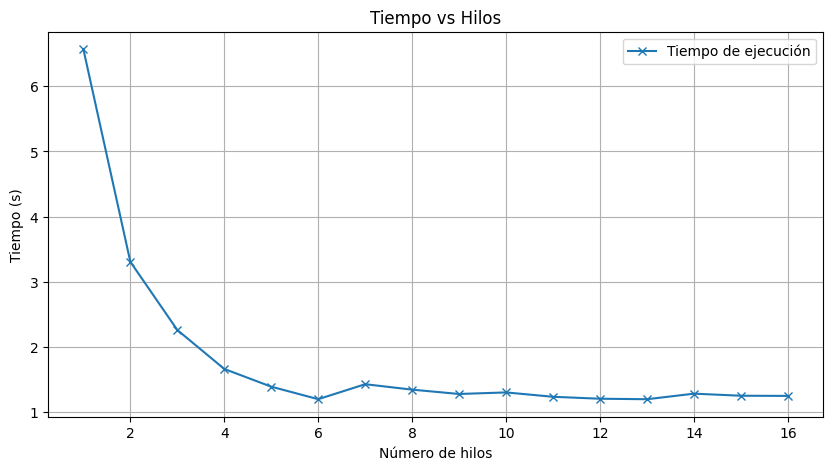

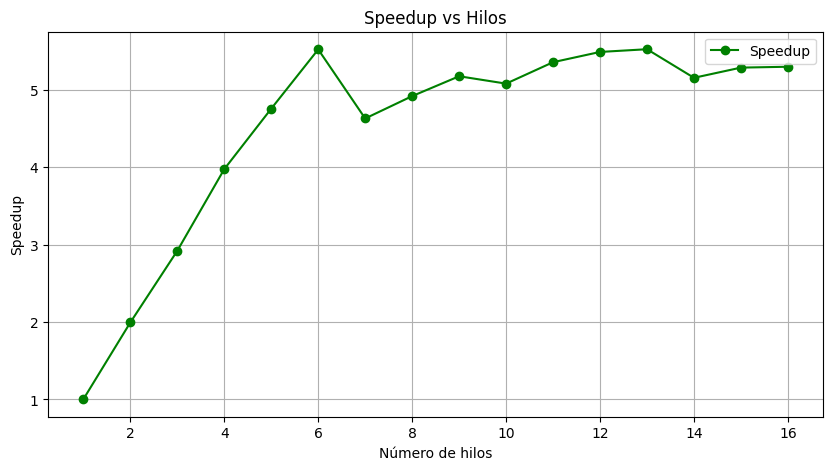

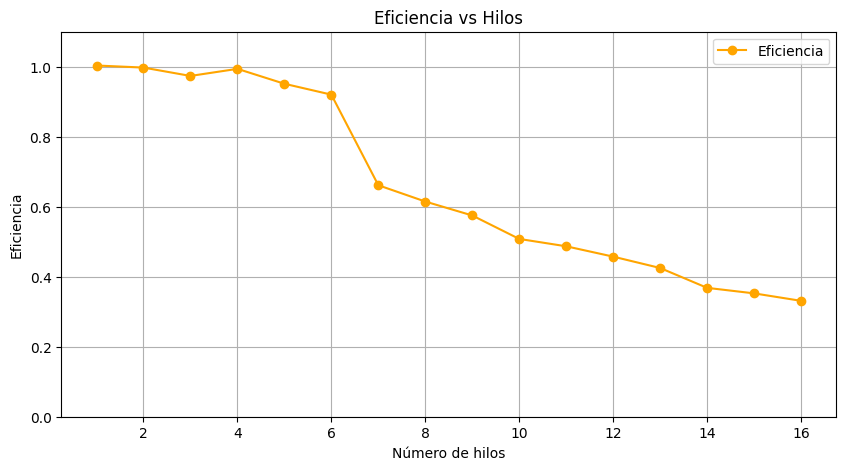

In [ ]:
hilos  = 16

n = []
Tp = []
speedup = []
eficiencia = []


for i in range(1, hilos + 1):


    start_time = time.time()

    out = subprocess.run(["./pi_p", str(i)], capture_output=True, text=True)

    end_time = time.time()

    time_taken = end_time - start_time

    n.append(i)
    Tp.append(time_taken)
    speedup.append(Ts/ time_taken)
    eficiencia.append((Ts / time_taken) / i)

    
df = pd.DataFrame({
    "Hilos": n,
    "Tiempo (s)": Tp,
    "Speedup": speedup,
    "Eficiencia": eficiencia
})

print(df)

# --- Gráfica Tiempo vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Tiempo (s)"], marker='o', label="Tiempo de ejecución")
plt.xlabel("Número de hilos")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Hilos")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Speedup vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Speedup"], marker='o', color='green', label="Speedup")
plt.xlabel("Número de hilos")
plt.ylabel("Speedup")
plt.title("Speedup vs Hilos")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Eficiencia vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Eficiencia"], marker='o', color='orange', label="Eficiencia")
plt.xlabel("Número de hilos")
plt.ylabel("Eficiencia")
plt.title("Eficiencia vs Hilos")
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()
